In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [25]:
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [26]:
train_path = 'D:/Dataset/Big/'
labels = os.listdir(train_path)
labels = ['surprise', 'fear', 'neutral', 'sad', 'disgust', 'contempt', 'happy', 'anger']
labels

['surprise', 'fear', 'neutral', 'sad', 'disgust', 'contempt', 'happy', 'anger']

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

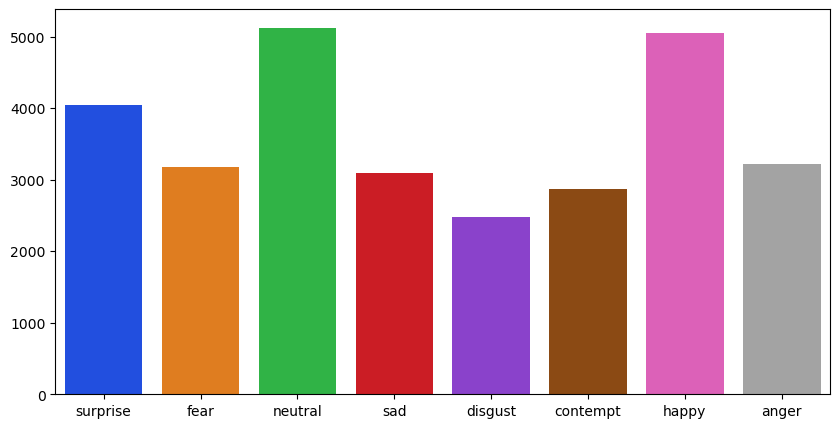

In [27]:
labels_count = []
for i in labels:
    count = len(os.listdir(train_path + '/' + i))
    labels_count.append(count)
    fig = plt.figure(figsize = (10, 5))
ax = sns.barplot(y = labels_count, x = labels, palette = 'bright')
plt.show()

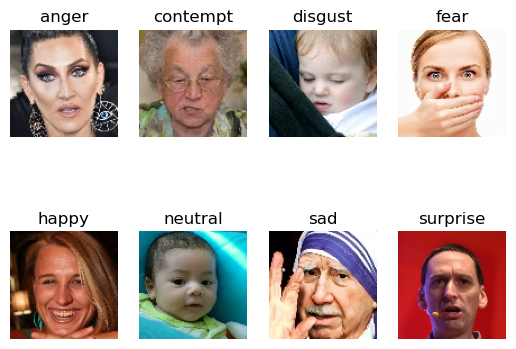

In [28]:
img1 = load_img(train_path+"/anger/image0000006.jpg")
img2 = load_img(train_path+'/contempt/ffhq_6.png')
img3 = load_img(train_path+'/disgust/ffhq_0.png')
img4 = load_img(train_path+'/fear/image0000284.jpg')
img5 = load_img(train_path+'/happy/ffhq_0.png')
img6 = load_img(train_path+'/neutral/ffhq_0.png')
img7 = load_img(train_path+'/sad/image0000013.jpg')
img8 = load_img(train_path+'/surprise/ffhq_1.png')
plt.figure()
plt.subplot(2, 4, 1)
plt.imshow(img1) # indirilen resim çizdiriliyor
plt.title('anger')
plt.axis("off")
plt.subplot(2, 4, 2)
plt.imshow(img2) # indirilen resim çizdiriliyor
plt.title('contempt')
plt.axis("off")
plt.subplot(2, 4, 3)
plt.imshow(img3) # indirilen resim çizdiriliyor
plt.title('disgust')
plt.axis("off")
plt.subplot(2, 4, 4)
plt.imshow(img4) # indirilen resim çizdiriliyor
plt.title('fear')
plt.axis("off")
plt.subplot(2, 4, 5)
plt.imshow(img5) # indirilen resim çizdiriliyor
plt.title('happy')
plt.axis("off")
plt.subplot(2, 4, 6)
plt.imshow(img6) # indirilen resim çizdiriliyor
plt.title('neutral')
plt.axis("off")
plt.subplot(2, 4, 7)
plt.imshow(img7) # indirilen resim çizdiriliyor
plt.title('sad')
plt.axis("off")
plt.subplot(2, 4, 8)
plt.imshow(img8) # indirilen resim çizdiriliyor
plt.title('surprise')
plt.axis("off")

plt.show()

In [29]:
x = img_to_array(img1)
x.shape
INPUT_PATH = 'D:/Dataset/Big'
EMOTIONS = [f.name for f in os.scandir(INPUT_PATH) if f.is_dir()]
IMAGE_SIZE = (96, 96)
print(EMOTIONS)
EMOTIONS = ['surprise', 'neutral', 'sad', 'happy', 'anger']


['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [30]:
x = img_to_array(img1)
x.shape


(96, 96, 3)

In [31]:
# в тесты надо вставить в начало

INPUT_PATH = 'D:/Dataset/Big'
EMOTIONS = [f.name for f in os.scandir(INPUT_PATH) if f.is_dir()]
IMAGE_SIZE = (96, 96)
print(EMOTIONS)
EMOTIONS = ['surprise', 'neutral', 'sad', 'happy', 'anger']
def image_generator1(input_path, emotions, image_size):
    for index, emotion in enumerate(emotions):
        for filename in os.listdir(os.path.join(input_path, emotion)):
            img = cv2.imread(os.path.join(input_path, emotion, filename))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to RGB
            #img = cv2.resize(img, image_size)
            img = img.astype('float32') / 255.0  # Normilize
            img = img.flatten()
            yield img, index

def load_images1(input_path, emotions, image_size):
    X, y = [], []
    for img, label in image_generator1(input_path, emotions, image_size):
        X.append(img)
        y.append(label)
    X = np.array(X)
    y = np.array(y)
    return X, y

# Load the images 1
X, y = load_images1(INPUT_PATH, EMOTIONS, IMAGE_SIZE)
input_shape = X[0].shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
(16414, 9216)
(4104, 9216)
(16414,)
(4104,)


In [32]:
X_train = X_train.reshape(-1, 96, 96, 1)
X_test = X_test.reshape(-1, 96, 96, 1)
# Создание модели
model = models.Sequential()

# Добавление слоев CNN
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))

# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Вывод структуры модели
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 94, 94, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 92, 92, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 44, 44, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 61952)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [33]:
# Обучение модели на обучающем наборе
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Оценка производительности модели на тестовом наборе
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
513/513 [==============================] - 129s 251ms/step - loss: 0.8781 - accuracy: 0.6223 - val_loss: 0.6450 - val_accuracy: 0.7373
Epoch 2/10
513/513 [==============================] - 132s 258ms/step - loss: 0.5842 - accuracy: 0.7639 - val_loss: 0.5591 - val_accuracy: 0.7671
Epoch 3/10
513/513 [==============================] - 134s 261ms/step - loss: 0.4708 - accuracy: 0.8152 - val_loss: 0.6185 - val_accuracy: 0.7522
Epoch 4/10
513/513 [==============================] - 132s 257ms/step - loss: 0.3564 - accuracy: 0.8607 - val_loss: 0.5932 - val_accuracy: 0.7785
Epoch 5/10
513/513 [==============================] - 133s 260ms/step - loss: 0.2345 - accuracy: 0.9132 - val_loss: 0.6840 - val_accuracy: 0.7673
Epoch 6/10
513/513 [==============================] - 132s 257ms/step - loss: 0.1278 - accuracy: 0.9537 - val_loss: 0.9480 - val_accuracy: 0.7549
Epoch 7/10
513/513 [==============================] - 134s 261ms/step - loss: 0.0821 - accuracy: 0.9702 - val_loss: 1.0636 -

In [43]:
# Предсказание вероятностей принадлежности к каждому классу на обучающем наборе
y_train_probs = model.predict(X_train)
y_train_pred = np.argmax(y_train_probs, axis=1)

# Вывод отчета о классификации
print('CNN model classification report on training set:')
print(classification_report(y_train, y_train_pred, target_names=EMOTIONS))

CNN model classification report on training set:
              precision    recall  f1-score   support

    surprise       0.99      0.99      0.99      3259
     neutral       1.00      0.98      0.99      4080
         sad       1.00      0.98      0.99      2466
       happy       0.98      1.00      0.99      4011
       anger       0.99      1.00      0.99      2598

    accuracy                           0.99     16414
   macro avg       0.99      0.99      0.99     16414
weighted avg       0.99      0.99      0.99     16414



In [38]:
# Предсказание вероятностей принадлежности к каждому классу на тестовом наборе
y_test_probs = model.predict(X_test)
y_test_pred = np.argmax(y_test_probs, axis=1)

# Вывод отчета о классификации
print('CNN model classification report on test set:')
print(classification_report(y_test, y_test_pred, target_names=EMOTIONS))
metrics_dict = classification_report(y_test, y_test_pred, target_names=EMOTIONS, output_dict=True)

CNN model classification report on test set:
              precision    recall  f1-score   support

    surprise       0.66      0.68      0.67       780
     neutral       0.88      0.80      0.84      1046
         sad       0.60      0.46      0.52       625
       happy       0.85      0.93      0.89      1033
       anger       0.61      0.72      0.66       620

    accuracy                           0.75      4104
   macro avg       0.72      0.72      0.72      4104
weighted avg       0.75      0.75      0.74      4104



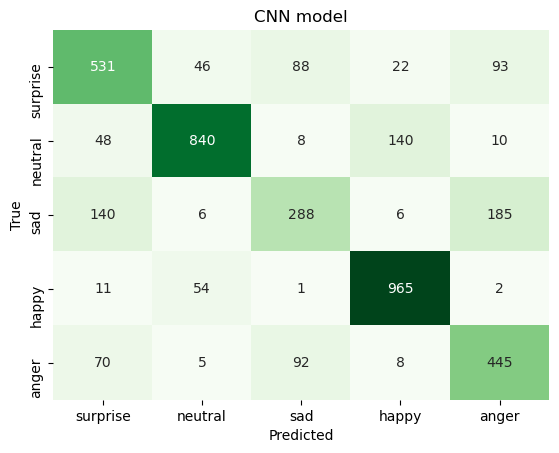

In [39]:
# Вычисление матрицы ошибок (confusion matrix)
cm = confusion_matrix(y_test, y_test_pred)

# Построение тепловой карты
plt.figure()
plt.title('CNN model')
sns.heatmap(cm, cmap='Greens', cbar=False, annot=True, fmt='d',
            xticklabels=EMOTIONS, yticklabels=EMOTIONS)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [42]:
model.save("D:/model_tagiev/model/my_model.h5")